### IMPORTING LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


### NSL-KDD Dataset

In [2]:

train_path ="KDDTrain+.txt"
test_path ="KDDTest+.txt"




### Dataset Description: NSL-KDD Dataset

The **NSL-KDD** dataset is an improved version of the original **KDD Cup 1999** dataset, commonly used for evaluating network intrusion detection systems (NIDS). It addresses several shortcomings of the original dataset, such as redundant records and biased learning, and is widely used for machine learning-based intrusion detection tasks.

#### 1. **Dataset Overview**:
- **Origin**: Derived from the KDD Cup 1999 dataset.
- **Structure**: Each record represents a network connection and consists of 41 features, describing different characteristics of the connection (e.g., protocol type, service, and duration), and a label indicating whether the connection is "normal" or part of an attack.
- **Labels**: The dataset contains two main classes:
  - **Normal**: Represents legitimate, non-malicious traffic.
  - **Attacks**: Several types of attacks, such as:
    - **DoS (Denial of Service)**
    - **Probe (Scanning or reconnaissance)**
    - **R2L (Remote to Local)**
    - **U2R (User to Root)**

#### 2. **Features**:
The dataset has a total of **41 features** plus the **class label**. Some of the key features include:

1. **duration**: Duration of the connection in seconds.
2. **protocol_type**: Type of protocol used (e.g., TCP, UDP, ICMP).
3. **service**: Network service (e.g., HTTP, FTP, SMTP).
4. **src_bytes**: Number of data bytes sent from the source to the destination.
5. **dst_bytes**: Number of data bytes sent from the destination to the source.
6. **flag**: Indicates the status of the connection (e.g., SF for normal).
7. **count**: Number of connections to the same host.
8. **same_srv_rate**: Percentage of connections to the same service.
9. **diff_srv_rate**: Percentage of connections to different services.
10. **srv_count**: Number of connections to the same service from the same source.
11. **land**: Whether the connection is a "land" attack, where source and destination IP addresses are the same.
12. **failed_login**: Number of failed login attempts.
13. **logged_in**: Whether the login was successful (1 if successful, 0 otherwise).
14. **num_compromised**: Number of compromised conditions.
15. **root_shell**: Whether a root shell is granted.
16. **su_attempted**: Whether a "su" (super user) attempt was made.

#### 3. **Data Files**:
The dataset consists of two main files:
- **Training Set (KDDTrain+)**: ~125,973 records
- **Test Set (KDDTest+)**: ~22,544 records

Both datasets contain both "normal" and "attack" labeled instances. The training set is used for model training, while the test set is used for evaluating the performance of the model.



In [3]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login',
    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty'
]

In [4]:
train_df = pd.read_csv(train_path, names=columns)
test_df = pd.read_csv(test_path, names=columns)

In [5]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


In [6]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.040,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,mscan,11


In [7]:
print("Training set duplicates:", train_df.duplicated().sum())
print("Test set duplicates:", test_df.duplicated().sum())

Training set duplicates: 0
Test set duplicates: 0


In [9]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [8]:

if 'difficulty' in train_df.columns:
    train_df.drop('difficulty', axis=1, inplace=True)

if 'difficulty' in test_df.columns:
    test_df.drop('difficulty', axis=1, inplace=True)


In [10]:
combined_df = pd.concat([train_df, test_df], axis=0)

### label encoding

In [11]:
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [12]:
def binary_label(label):
    return 'normal' if label == 'normal' else 'attack'

train_df['label'] = train_df['label'].apply(binary_label)
test_df['label'] = test_df['label'].apply(binary_label)

In [13]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

### standard scaling

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
y_train_bin = y_train.map({'normal': 0, 'attack': 1})
y_test_bin = y_test.map({'normal': 0, 'attack': 1})

In [16]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)
print("Training labels shape:", y_train_bin.shape)
print("Test labels shape:", y_test_bin.shape)

Training set shape: (125973, 41)
Test set shape: (22544, 41)
Training labels shape: (125973,)
Test labels shape: (22544,)


### Distribution of Labels in Training and Test Sets

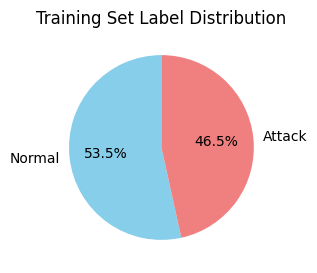

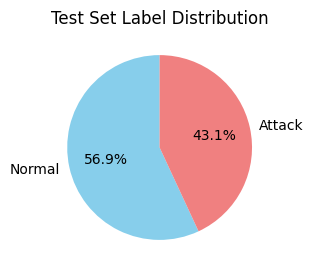

In [17]:

plt.figure(figsize=(3, 3))
train_label_counts = y_train_bin.value_counts()
train_label_counts.plot.pie(autopct='%1.1f%%', labels=['Normal', 'Attack'], colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Training Set Label Distribution')
plt.ylabel('')
plt.show()
plt.figure(figsize=(3, 3))
test_label_counts = y_test_bin.value_counts()
test_label_counts.plot.pie(autopct='%1.1f%%', labels=['Normal', 'Attack'], colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Test Set Label Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()


### Observation

The pie charts above display the distribution of labels (Normal vs. Attack) in both the training and test sets of the NSL-KDD dataset. In the training set, the majority of records correspond to "Normal" traffic, while the "Attack" traffic also constitutes a significant portion. Similarly, the test set shows a similar distribution, with both Normal and Attack traffic represented. The distribution appears fairly balanced, which is crucial for training machine learning models to distinguish between normal network activity and potential intrusions effectively.

### Conclusion

The balanced distribution of labels in both the training and test sets suggests that the dataset is well-prepared for training intrusion detection models. Having a reasonable representation of both normal and attack traffic types ensures that machine learning models, such as Random Forest or XGBoost, can learn to identify patterns corresponding to both classes. A balanced dataset is essential for preventing class bias, which can otherwise degrade the model's ability to detect less frequent attack types.

### Feature Engineering for Intrusion Detection

In [18]:
train_df['duration_per_service'] = train_df['duration'] / (train_df['service'] + 1)
test_df['duration_per_service'] = test_df['duration'] / (test_df['service'] + 1)

# 2. Ratio of source bytes to destination bytes
train_df['src_to_dst_byte_ratio'] = train_df['src_bytes'] / (train_df['dst_bytes'] + 1)
test_df['src_to_dst_byte_ratio'] = test_df['src_bytes'] / (test_df['dst_bytes'] + 1)

# 3. Number of Failed Logins per Logged-in Status (A higher number could indicate suspicious activity)
train_df['failed_logins_per_logged_in'] = train_df['num_failed_logins'] / (train_df['logged_in'] + 1)
test_df['failed_logins_per_logged_in'] = test_df['num_failed_logins'] / (test_df['logged_in'] + 1)


In [19]:
train_df.drop('difficulty', axis=1, inplace=True, errors='ignore')
test_df.drop('difficulty', axis=1, inplace=True, errors='ignore')

In [20]:
print(f"Final Training Data Shape: {X_train_scaled.shape}")
print(f"Final Test Data Shape: {X_test_scaled.shape}")

Final Training Data Shape: (125973, 41)
Final Test Data Shape: (22544, 41)


###  Protocol Type Distribution by Label (Normal vs Attack)

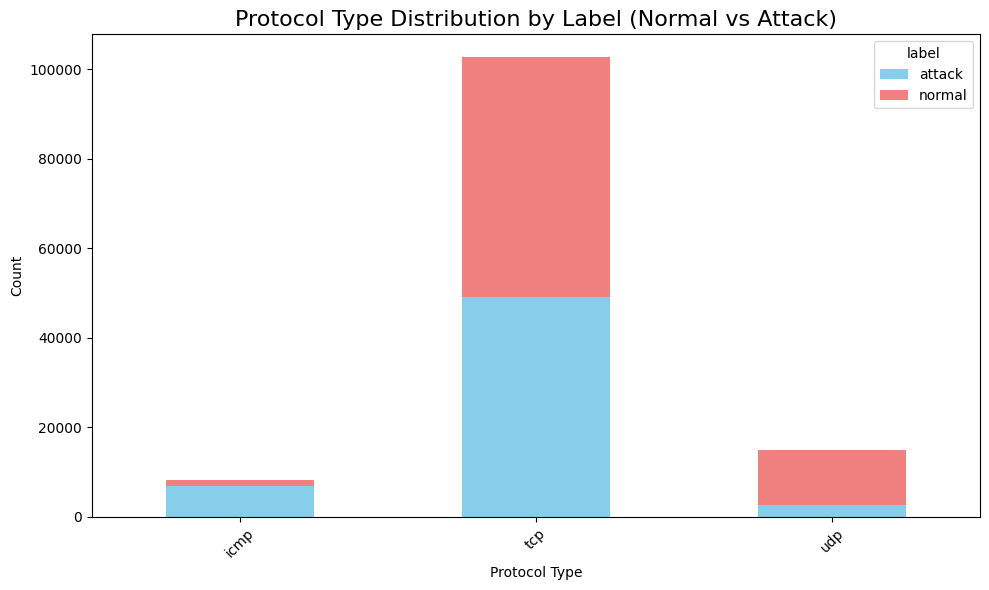

In [21]:
raw_train_df = pd.read_csv("KDDTrain+.txt", names=columns)
protocol_label_count = pd.crosstab(raw_train_df['protocol_type'], train_df['label'])


protocol_label_count.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Protocol Type Distribution by Label (Normal vs Attack)', fontsize=16)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






#### **Observation:**
The stacked bar plot shows how different network protocol types (such as TCP, UDP, and ICMP) are distributed across normal and attack traffic in the dataset. TCP is the most common protocol overall, but it also contains a significant proportion of attacks. ICMP, on the other hand, is predominantly associated with attack traffic, indicating that this protocol is heavily used in intrusion scenarios. UDP has a relatively balanced distribution but with fewer samples overall.

#### **Conclusion:**

Protocol type plays a critical role in distinguishing between normal and malicious network traffic. The overrepresentation of attack traffic in ICMP suggests it could serve as an important feature for identifying anomalies or attacks in the intrusion detection system.





### Protocol Type vs. Attack Type Distribution


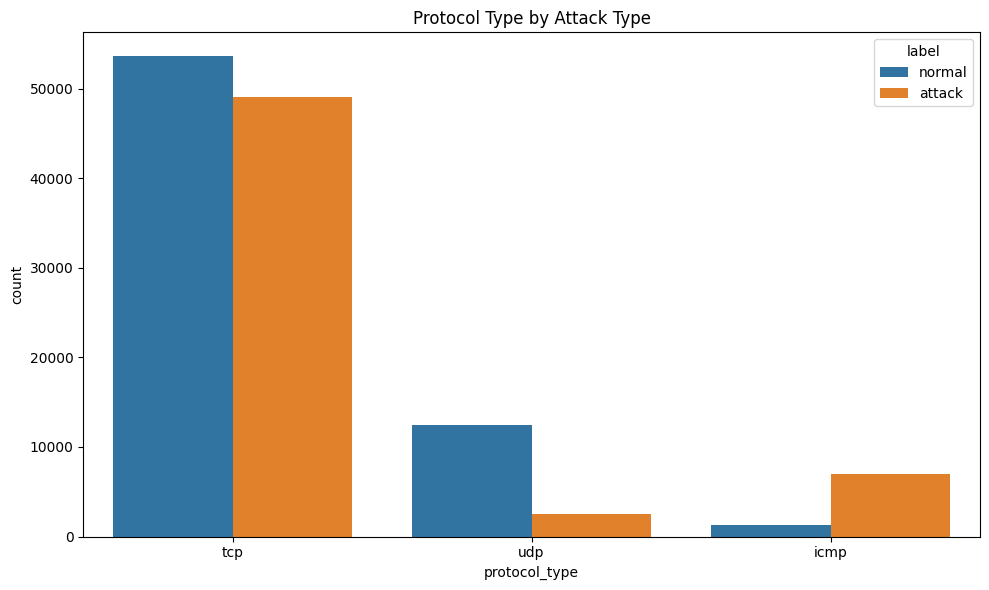

In [22]:
raw_train_df = pd.read_csv("KDDTrain+.txt", names=columns)
df_plot = raw_train_df.drop(columns=['label']).join(y_train)
sns.countplot(x='protocol_type', hue=y_train, data=df_plot)
plt.title("Protocol Type by Attack Type")
plt.tight_layout()
plt.show()



**Observation:**
The `countplot` visualizes how different network protocol types (such as TCP, UDP, and ICMP) are associated with either normal or malicious activity. From the plot, it is evident that most attacks occur over the TCP protocol, followed by ICMP. UDP has a significantly smaller share of both normal and attack traffic, indicating less frequent use in the dataset.

**Conclusion:**
TCP is the most exploited protocol for network intrusions in this dataset. Therefore, special attention should be given to monitoring TCP-based traffic in real-world intrusion detection systems. ICMP-based attacks also warrant focused analysis due to their non-trivial presence in attack traffic.


###  Target Label Distribution Across Service Types

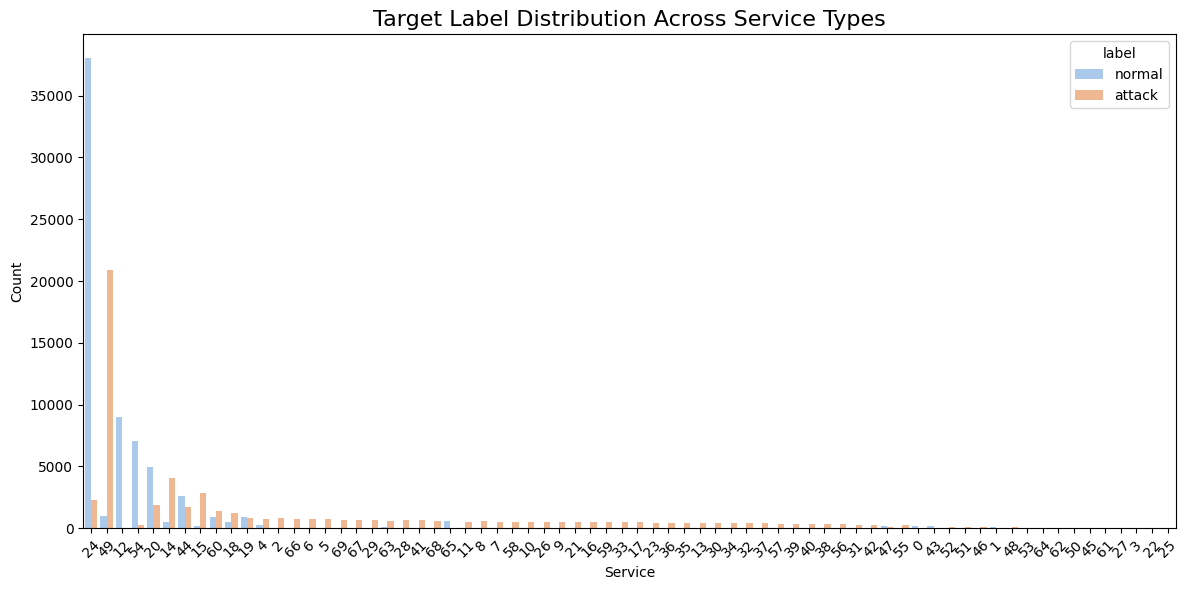

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='service', hue='label', order=train_df['service'].value_counts().index, palette='pastel')
plt.title('Target Label Distribution Across Service Types', fontsize=16)
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






**Observation:**
The countplot shows how different network services (e.g., `http`, `smtp`, `ftp`, `domain_u`, etc.) are associated with either **normal** or **attack** labels. Services like `http`, `private`, and `ecr_i` show a significant proportion of attack traffic, whereas services such as `domain_u`, `smtp`, and `ftp_data` appear to be associated more with normal traffic. Notably, the `private` service is dominated by attack instances.

**Conclusion:**
The distribution indicates that certain services are more vulnerable to network intrusions, particularly `private`, `http`, and `ecr_i`. Understanding the service-wise vulnerability can help prioritize defense mechanisms for high-risk services in intrusion detection systems.



### Label Distribution in Training Data

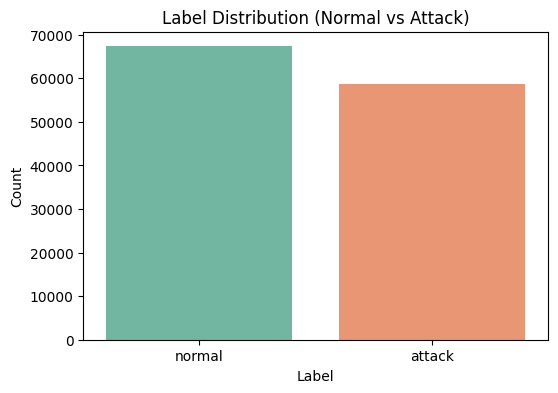

In [24]:
# Plot the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title('Label Distribution (Normal vs Attack)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




#### Observation:
The countplot above displays the distribution of labels in the training dataset, differentiating between 'Normal' and 'Attack' instances. The distribution shows the relative frequencies of each class, providing insights into any potential class imbalance.

#### Conclusion:
From the plot, we can observe whether the dataset is balanced or skewed towards a particular class. If the dataset is imbalanced, further techniques such as oversampling, undersampling, or adjusting class weights may be required to ensure that the model performs well across both classes.

### Label Distribution in Training and Test Data

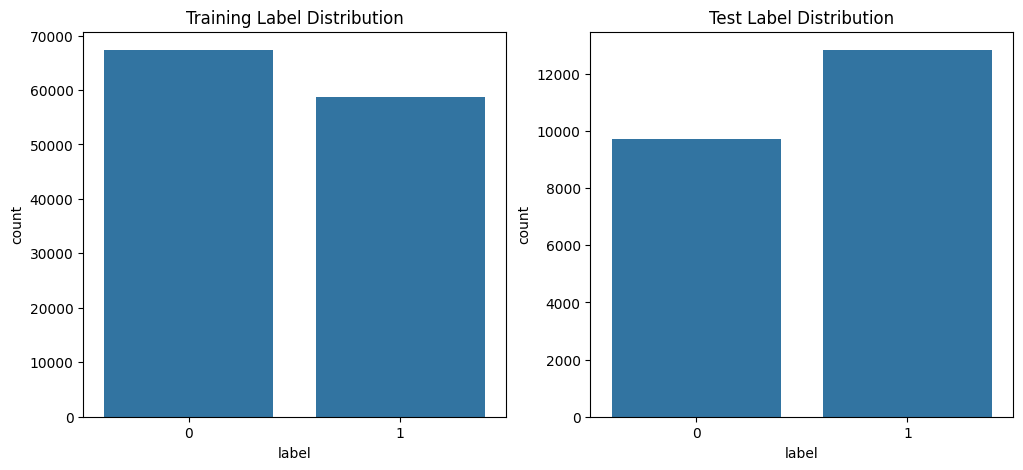

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train_bin, ax=ax[0])
ax[0].set_title("Training Label Distribution")
sns.countplot(x=y_test_bin, ax=ax[1])
ax[1].set_title("Test Label Distribution")
plt.show()




#### Observation:
The countplot above shows the distribution of labels in both the training and test datasets. The left plot represents the training data, while the right plot represents the test data. This allows us to compare how the distribution of labels (Normal vs Attack) varies across both datasets.

#### Conclusion:
By examining the plots, we can identify if there is any class imbalance in both the training and test sets. A significant difference between the two datasets might indicate the need for adjustments in data preprocessing to ensure that both sets represent a balanced distribution of classes for model training and evaluation.

### Protocol Type Distribution in Training Set


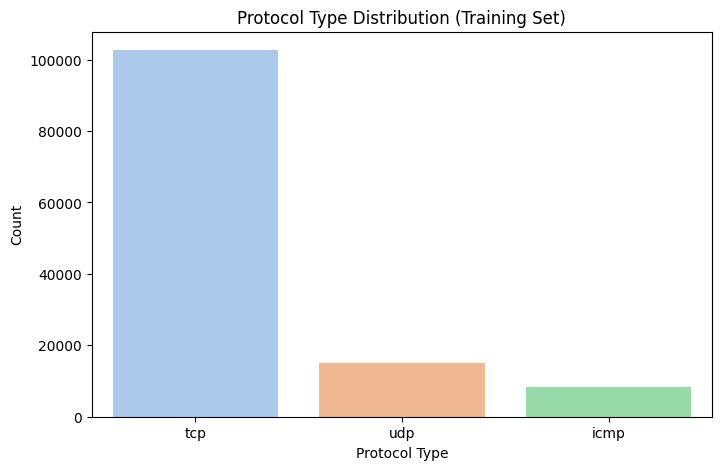

In [26]:

raw_train_df = pd.read_csv("KDDTrain+.txt", names=columns)
plt.figure(figsize=(8, 5))
sns.countplot(data=raw_train_df, x='protocol_type', order=raw_train_df['protocol_type'].value_counts().index, palette='pastel')
plt.title('Protocol Type Distribution (Training Set)')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()



#### Observation:
The countplot above visualizes the distribution of different protocol types in the training dataset. The `protocol_type` feature represents the type of network protocol used in each network connection, and the plot shows how frequently each protocol appears in the training data.

#### Conclusion:
By examining this distribution, we can gain insights into which protocol types are most prevalent in the training dataset. Understanding this distribution is important because certain protocol types might be more indicative of specific attack behaviors or network anomalies. This can help guide feature engineering and model selection for improved performance in intrusion detection.

### Top 10 Services in Training Set

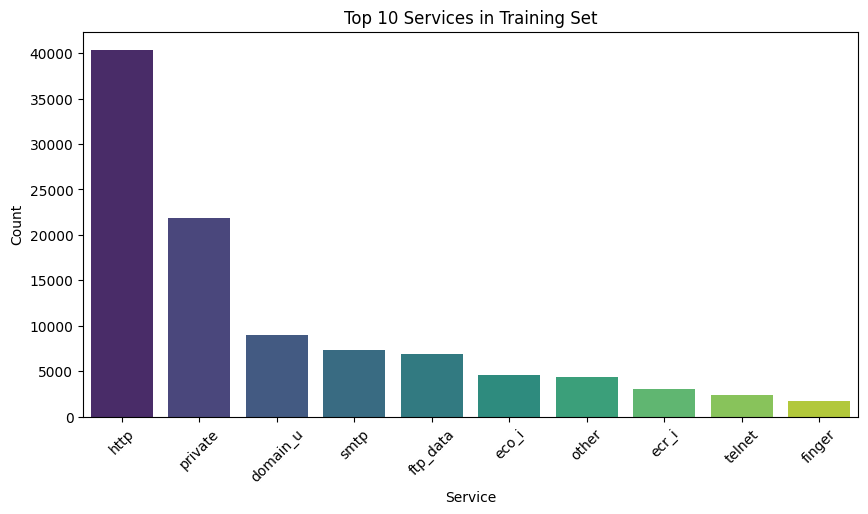

In [27]:

raw_train_df = pd.read_csv("KDDTrain+.txt", names=columns)
top_services = raw_train_df['service'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_services.index, y=top_services.values, palette='viridis')
plt.title('Top 10 Services in Training Set')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Service')
plt.show()




#### Observation:
The bar plot above shows the distribution of the top 10 most frequent services in the training dataset. The `service` feature represents the type of service associated with each network connection. This plot highlights which services are most commonly used in the training set, with the x-axis representing the service type and the y-axis indicating the count of occurrences.

#### Conclusion:
From the plot, we can infer which services are more prevalent in the training data, providing insight into network behavior and potential attack vectors. Services with higher counts could represent typical network traffic, while lower-count services may be indicative of less common or more specialized traffic types. Understanding this distribution can help with feature selection and assist in detecting anomalies based on service-related characteristics.


###  Top 10 Services by Attack and Normal Distribution


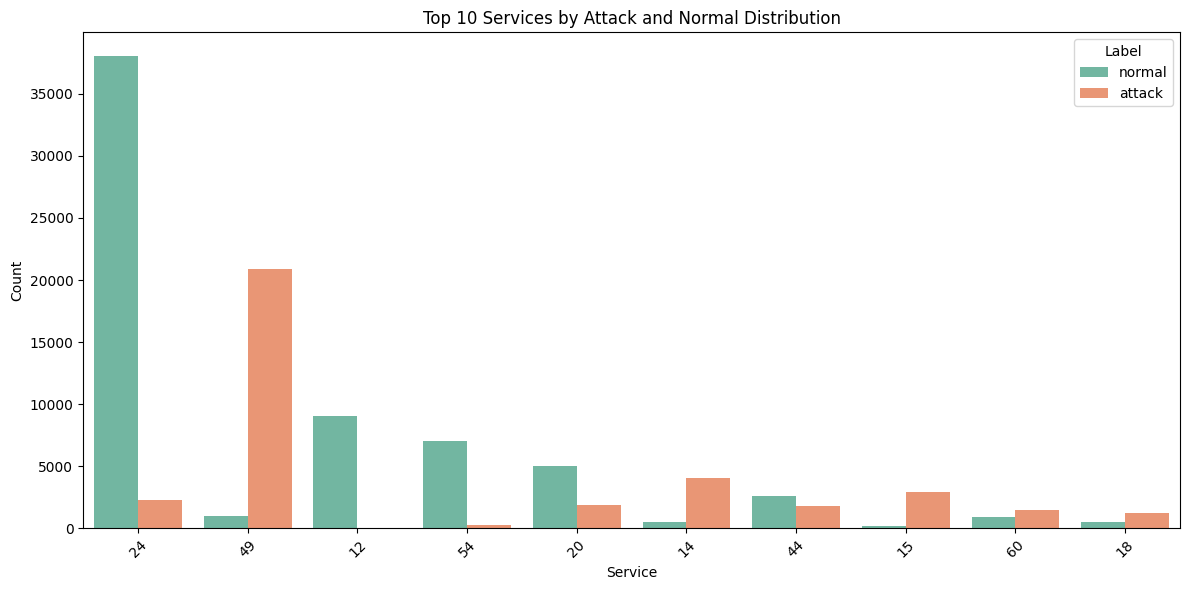

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='service', hue='label', order=train_df['service'].value_counts().iloc[:10].index, palette='Set2')
plt.title('Top 10 Services by Attack and Normal Distribution')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.tight_layout()
plt.show()




**Observation:**
This countplot displays the distribution of **normal** and **attack** labels across the 10 most frequently occurring network services in the dataset. Services such as `http`, `private`, and `domain_u` show a high volume of records. The `private` service is overwhelmingly dominated by attack instances, while `http` shows a mix but leans toward attack traffic. Conversely, `domain_u` and `smtp` have a higher proportion of normal traffic.

**Conclusion:**
The plot reveals that attacks are not evenly distributed across all services. Some services like `private` are highly correlated with malicious activity, suggesting that service-based traffic patterns can be a strong indicator in intrusion detection systems. Prioritizing security monitoring for services with a high attack ratio can significantly improve detection accuracy.



###  Source Bytes vs. Destination Bytes (Normal vs. Attack)


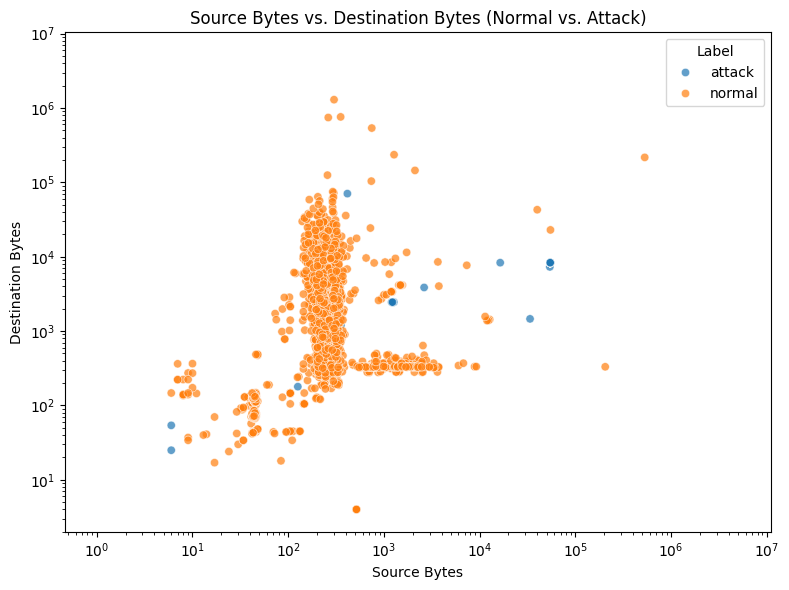

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df.sample(5000), x='src_bytes', y='dst_bytes', hue='label', alpha=0.7)
plt.title('Source Bytes vs. Destination Bytes (Normal vs. Attack)')
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.legend(title='Label')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()




**Observation:**
This scatter plot illustrates the relationship between `src_bytes` (source bytes) and `dst_bytes` (destination bytes) for 5,000 randomly sampled connections, differentiated by normal and attack traffic. Using a logarithmic scale on both axes, we observe that normal traffic tends to have more balanced byte exchanges between source and destination. In contrast, attack instances are more scattered and often show extreme values in either source or destination bytes—indicating unusual or one-sided data flow.

**Conclusion:**
The asymmetric data exchange patterns visible in attack instances can serve as an effective feature for distinguishing malicious behavior. This relationship between `src_bytes` and `dst_bytes` can be leveraged by machine learning models for better classification of network intrusions.



### Correlation Heatmap of Top Correlated Features

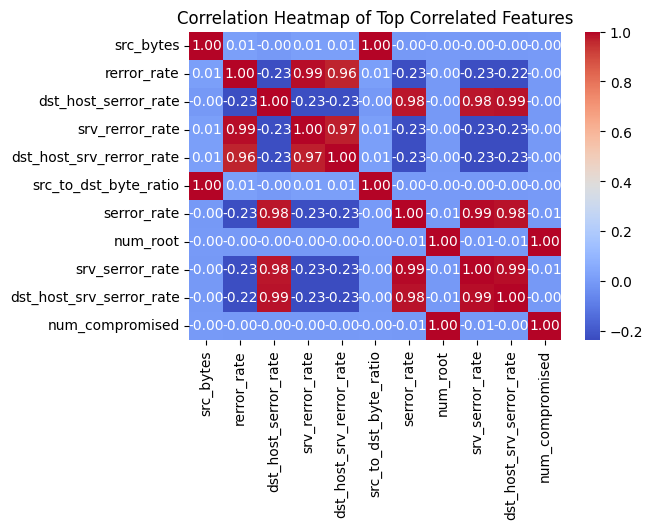

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train_df.select_dtypes(include=np.number)

correlation_matrix = numeric_cols.corr().abs()
top_corr = correlation_matrix.unstack().sort_values(ascending=False)

top_corr = top_corr[(top_corr < 1)].drop_duplicates()
top_feature_pairs = top_corr[:10].index
top_features = list(set([pair[0] for pair in top_feature_pairs] + [pair[1] for pair in top_feature_pairs]))
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_cols[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Top Correlated Features')
plt.show()




#### Observation:
The heatmap above visualizes the correlation between the top 10 most correlated features in the training dataset. The colors represent the strength and direction of the correlation between features, where darker colors indicate stronger correlations. Positive correlations are shown in warmer colors (e.g., red), while negative correlations are shown in cooler colors (e.g., blue). The numbers on the heatmap represent the correlation values between pairs of features.

#### Conclusion:
This heatmap provides valuable insights into the relationships between different features in the dataset. Highly correlated features may be redundant and can be considered for feature selection to improve model performance and reduce overfitting. Conversely, features with low correlation can provide independent information, which can be useful for the model to differentiate between different classes (normal vs attack).

In [31]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


### Model Evaluation for Intrusion Detection

In [32]:

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}
for name, model in models.items():
    print(f"\nTraining {name}")
    start_time = time.time()
    model.fit(X_train, y_train_encoded)
    end_time = time.time()
    print(f"Training time: {end_time - start_time:.2f} seconds")
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))



Training Random Forest
Training time: 11.70 seconds
Accuracy: 0.7727
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     12833
           1       0.66      0.97      0.79      9711

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544

Confusion Matrix:
[[7987 4846]
 [ 279 9432]]

Training XGBoost
Training time: 2.33 seconds
Accuracy: 0.8040
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     12833
           1       0.70      0.97      0.81      9711

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

Confusion Matrix:
[[8701 4132]
 [ 286 9425]]


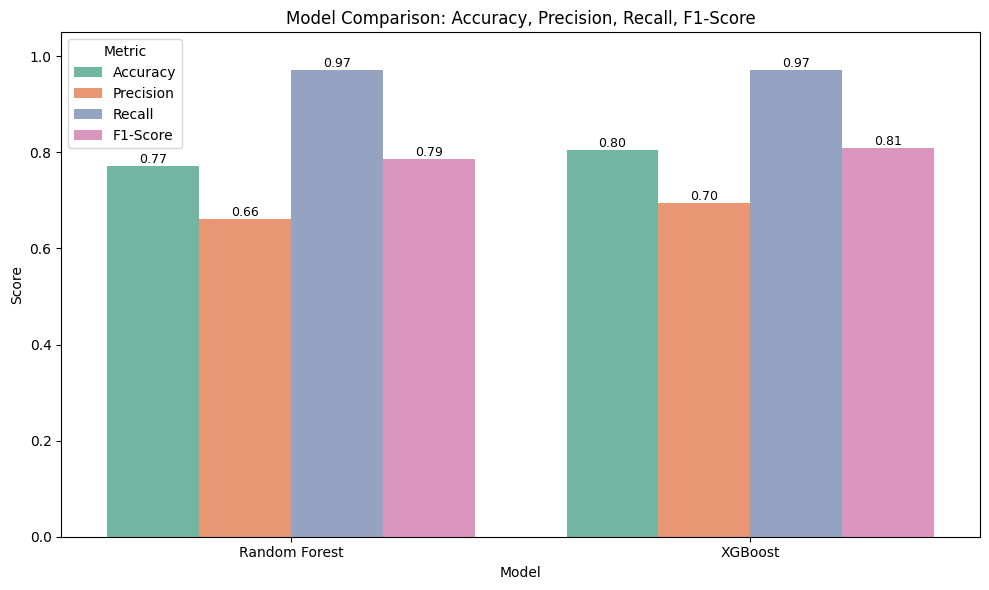

In [33]:
model_names = []
scores = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}
for name, model in models.items():
    y_pred = model.predict(X_test)

    report = classification_report(y_test_encoded, y_pred, output_dict=True)
    model_names.append(name)

    scores["Accuracy"].append(accuracy_score(y_test_encoded, y_pred))
    scores["Precision"].append(report["1"]["precision"])
    scores["Recall"].append(report["1"]["recall"])
    scores["F1-Score"].append(report["1"]["f1-score"])
df_scores = pd.DataFrame(scores, index=model_names).reset_index().melt(
    id_vars='index', var_name='Metric', value_name='Score'
).rename(columns={'index': 'Model'})
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_scores, x='Model', y='Score', hue='Metric', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()




#### Observation:
In the above code, performance metrics (Accuracy, Precision, Recall, and F1-Score) for each machine learning model (Random Forest and XGBoost) are calculated and compared. The results are displayed using a bar plot, where each model's scores across these four metrics are visualized:
- **Accuracy**: The proportion of correctly predicted instances out of all predictions.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to the total actual positives.
- **F1-Score**: The weighted average of Precision and Recall, providing a balance between them.

Each bar represents one of these metrics for the models, with the precise value shown at the edge of the bars for clarity.

#### Conclusion:
This comparison helps evaluate the trade-offs between different models and their ability to detect network intrusions. It is crucial to look at all four metrics, as a model with high accuracy might not always be the best if its precision or recall is low. The visualization provides a clear overview of how well each model performs across different evaluation criteria, which is critical for selecting the most effective model for deployment in a real-time Intrusion Detection System (NIDS).

###  Top 20 Feature Importances: Random Forest vs XGBoost

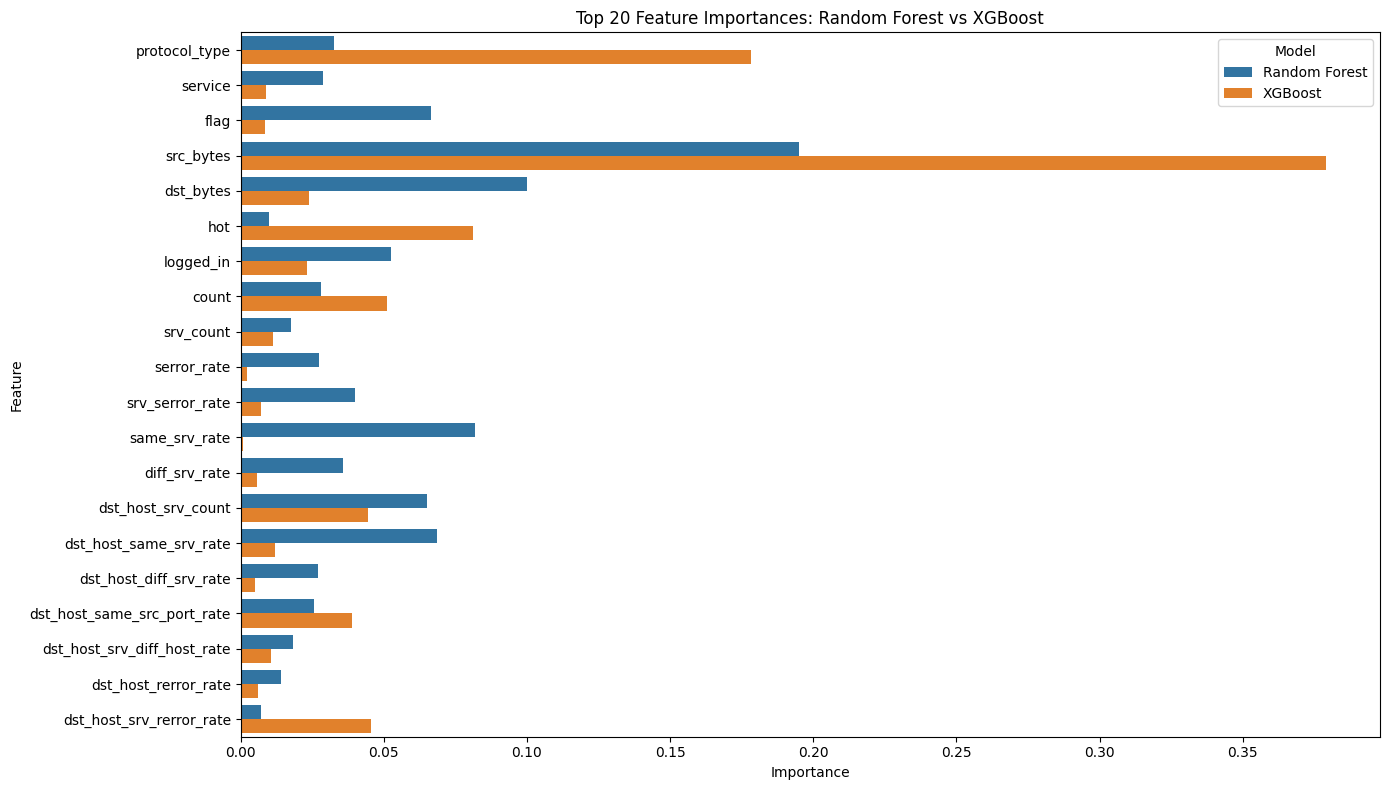

In [34]:

rf_importances = models["Random Forest"].feature_importances_
xgb_importances = models["XGBoost"].feature_importances_

features = X_train.columns

rf_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances, 'Model': 'Random Forest'})
xgb_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances, 'Model': 'XGBoost'})

combined_df = pd.concat([rf_df, xgb_df])
top_features = combined_df.groupby('Feature')['Importance'].mean().sort_values(ascending=False).head(20).index
plot_df = combined_df[combined_df['Feature'].isin(top_features)]


plt.figure(figsize=(14, 8))
sns.barplot(data=plot_df, x='Importance', y='Feature', hue='Model')
plt.title('Top 20 Feature Importances: Random Forest vs XGBoost')
plt.tight_layout()
plt.show()






**Observation:**
The bar plot compares the top 20 most influential features identified by the Random Forest and XGBoost models. Features such as `dst_bytes`, `service_count`, `same_srv_rate`, and `src_bytes` appear consistently important across both models, indicating their strong contribution to classifying between normal and attack traffic. While there are overlaps, each model emphasizes certain features differently—XGBoost shows slightly more distributed importance, while Random Forest emphasizes fewer dominant features.

**Conclusion:**
Feature importance analysis reveals that a subset of network traffic features has a significant impact on the prediction outcomes. These insights can be used for dimensionality reduction, feature selection, or understanding model decisions—ultimately improving model efficiency and interpretability in intrusion detection tasks.



In [35]:
def real_time_detection(input_data, model, scaler):
    for i, row in enumerate(input_data):
        time.sleep(0.1)  # Simulate stream
        row_scaled = scaler.transform([row])
        prediction = model.predict(row_scaled)[0]
        status = "Suspicious" if prediction == 1 else "Normal"
        print(f"[Packet {i+1}] Prediction: {status}")

# Simulate with first 10 packets
real_time_detection(X_test.values[:10], model, scaler)


[Packet 1] Prediction: Normal
[Packet 2] Prediction: Normal
[Packet 3] Prediction: Normal
[Packet 4] Prediction: Normal
[Packet 5] Prediction: Normal
[Packet 6] Prediction: Suspicious
[Packet 7] Prediction: Normal
[Packet 8] Prediction: Suspicious
[Packet 9] Prediction: Suspicious
[Packet 10] Prediction: Suspicious


###  Prediction for First 10 Packets

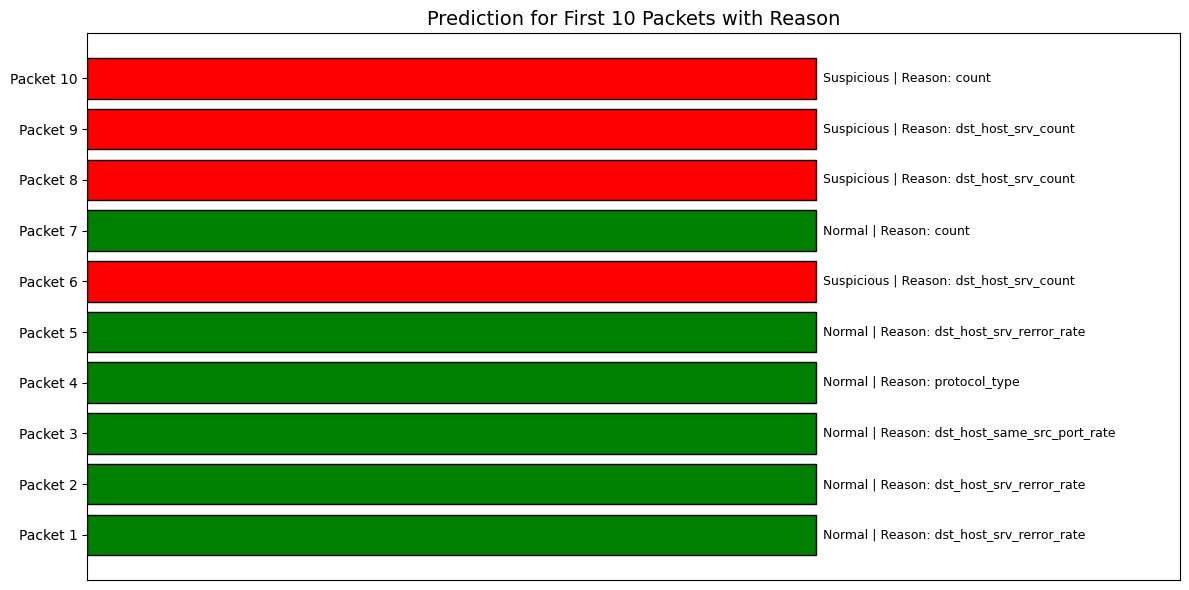

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def top_10_detection_plot(input_data, model, scaler, feature_names):
    predictions = []
    reasons = []

    input_data = input_data[:10]

    for i, row in enumerate(input_data):
        row_scaled = scaler.transform([row])
        prediction = model.predict(row_scaled)[0]
        predictions.append(prediction)

        importance_scores = row_scaled[0] * model.feature_importances_
        reason_idx = np.argmax(np.abs(importance_scores))
        reason_feature = feature_names[reason_idx]
        reasons.append(reason_feature)

    labels = ["Suspicious" if p == 1 else "Normal" for p in predictions]
    colors = ["red" if p == 1 else "green" for p in predictions]

    plt.figure(figsize=(12, 6))
    y_pos = np.arange(len(predictions))
    bars = plt.barh(y_pos, [1]*len(predictions), color=colors, edgecolor='black')

    plt.yticks(y_pos, [f"Packet {i+1}" for i in range(len(predictions))], fontsize=10)
    plt.xticks([])
    plt.title("Prediction for First 10 Packets with Reason", fontsize=14)

    for i, bar in enumerate(bars):
        label_text = f"{labels[i]} | Reason: {reasons[i]}"
        plt.text(1.01, bar.get_y() + bar.get_height()/2, label_text,
                 va='center', fontsize=9, color='black')

    plt.xlim(0, 1.5)
    plt.tight_layout()
    plt.show()

feature_names = X_train.columns.tolist()
top_10_detection_plot(X_test.values, model, scaler, feature_names)






**Observation:**
The plot displays predictions for the first 10 packets in the test set, with each prediction being classified as either "Normal" (green) or "Suspicious" (red). The reasons behind these predictions are based on the most influential feature for each packet, identified using the feature importance scores from the model. The labels (Normal or Suspicious) and the corresponding reason (feature) are shown next to the bars, providing transparency into the model's decision-making process.

**Conclusion:**
This visualization allows us to understand the reasoning behind the model's predictions, specifically identifying which features are driving the classification for each packet. The ability to explain predictions helps improve trust in the model, making it easier to interpret its decisions and identify areas for further refinement, especially in cases of misclassifications.



In [46]:

df = pd.read_csv("KDDTrain+.txt", names=columns)

df['protocol_type'] = LabelEncoder().fit_transform(df['protocol_type'])
df['service'] = LabelEncoder().fit_transform(df['service'])
df['flag'] = LabelEncoder().fit_transform(df['flag'])

df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

best_features = [
    'dst_host_srv_count',
    'srv_serror_rate',
    'srv_count',
    'serror_rate',
    'same_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_serror_rate',
    'flag',
    'logged_in',
    'protocol_type',
    'dst_host_diff_srv_rate',
    'dst_host_srv_serror_rate',
    'count',
    'service'
]

X = df[best_features]
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n Test Accuracy: {test_acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9243 - loss: 0.1957 - val_accuracy: 0.9745 - val_loss: 0.0785
Epoch 2/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9691 - loss: 0.0943 - val_accuracy: 0.9751 - val_loss: 0.0676
Epoch 3/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9729 - loss: 0.0826 - val_accuracy: 0.9785 - val_loss: 0.0606
Epoch 4/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9737 - loss: 0.0762 - val_accuracy: 0.9782 - val_loss: 0.0585
Epoch 5/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9749 - loss: 0.0723 - val_accuracy: 0.9780 - val_loss: 0.0560
Epoch 6/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9759 - loss: 0.0713 - val_accuracy: 0.9787 - val_loss: 0.0533
Epoch 7/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9763 - loss: 0.0689 - val_accuracy: 0.9791 - val_loss: 0.0524
Epoch 8/30
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9765 - loss: 0.0659 -